# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [1]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 2s 1us/step


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [3]:
import matplotlib.pyplot as plt

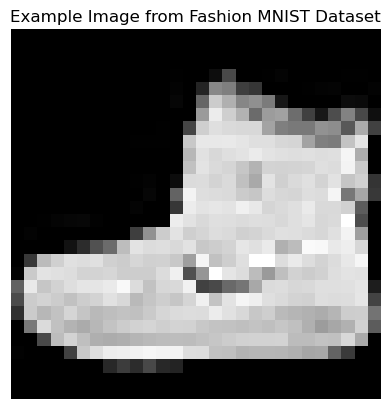

In [6]:
# Visualize an image from the dataset
plt.imshow(x_train[0], cmap='gray')
plt.title('Example Image from Fashion MNIST Dataset')
plt.axis('off')
plt.show()

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [7]:
# Normalize the X train and X test data
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [8]:
import numpy as np

# Reshape the X arrays to include a 4th dimension for single channel
x_train_reshaped = np.reshape(x_train_normalized, (x_train_normalized.shape[0], 28, 28, 1))
x_test_reshaped = np.reshape(x_test_normalized, (x_test_normalized.shape[0], 28, 28, 1))


**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [9]:
from keras.utils import to_categorical

In [10]:
# Convert y_train and y_test to one-hot encoded format
num_classes = 10  # Number of classes (labels) in the Fashion MNIST dataset

y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [12]:
model = Sequential([
    # Convolutional layer with 32 filters and kernel size (4,4)
    Conv2D(32, (4, 4), activation='relu', input_shape=(28, 28, 1)),
    # Pooling layer with pool size (2,2)
    MaxPooling2D(pool_size=(2, 2)),
    # Flatten layer to convert 2D feature maps into a 1D feature vector
    Flatten(),
    # Dense layer with 128 neurons and ReLU activation
    Dense(128, activation='relu'),
    # Final dense layer with 10 neurons (one for each class) and softmax activation
    Dense(10, activation='softmax')
])


In [13]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
___________________

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [14]:
epochs = 10  
history = model.fit(x_train_reshaped, y_train_one_hot, epochs=epochs, validation_split=0.2, batch_size=32)

Epoch 1/10


1500/1500 [==============================] - 17s 10ms/step - loss: 0.4275 - accuracy: 0.8478 - val_loss: 0.3424 - val_accuracy: 0.8752
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2895 - accuracy: 0.8964 - val_loss: 0.2852 - val_accuracy: 0.8971
Epoch 3/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.2464 - accuracy: 0.9106 - val_loss: 0.2796 - val_accuracy: 0.9008
Epoch 4/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.2160 - accuracy: 0.9216 - val_loss: 0.2735 - val_accuracy: 0.9053
Epoch 5/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.1924 - accuracy: 0.9299 - val_loss: 0.2753 - val_accuracy: 0.9062
Epoch 6/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.1726 - accuracy: 0.9378 - val_loss: 0.3108 - val_accuracy: 0.8954
Epoch 7/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.1551 - accuracy: 0.9439 - val_loss: 0.2845

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [16]:
# Predict probabilities for test data
y_prob = model.predict(x_test_reshaped)

# Convert probabilities to class labels
y_pred = np.argmax(y_prob, axis=1)


313/313 [==============================] - 1s 3ms/step


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert one-hot encoded y_test back to categorical labels
y_test_labels = np.argmax(y_test_one_hot, axis=1)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred, average='weighted')
recall = recall_score(y_test_labels, y_pred, average='weighted')
f1 = f1_score(y_test_labels, y_pred, average='weighted')

# Print the evaluation metrics
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Test Loss: 0.3626386821269989
Test Accuracy: 0.9042999744415283
Accuracy: 0.9043
Precision: 0.905732245668213
Recall: 0.9043
F1-score: 0.9042791082902207


In [19]:
from sklearn.metrics import classification_report

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test_one_hot, verbose=0)

# Predict probabilities for test data
y_prob = model.predict(x_test_reshaped)

# Convert probabilities to class labels
y_pred = np.argmax(y_prob, axis=1)

# Convert one-hot encoded y_test back to categorical labels
y_test_labels = np.argmax(y_test_one_hot, axis=1)

# Generate classification report
report = classification_report(y_test_labels, y_pred, digits=2)

# Print the classification report
print("Classification Report:\n", report)

313/313 [==============================] - 1s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84      1000
           1       1.00      0.97      0.98      1000
           2       0.88      0.80      0.83      1000
           3       0.88      0.94      0.91      1000
           4       0.81      0.89      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.73      0.76      0.75      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



             precision    recall  f1-score   support

          0       0.86      0.85      0.85      1000
          1       0.99      0.97      0.98      1000
          2       0.88      0.83      0.85      1000
          3       0.91      0.91      0.91      1000
          4       0.83      0.88      0.85      1000
          5       0.97      0.98      0.98      1000
          6       0.73      0.76      0.74      1000
          7       0.95      0.97      0.96      1000
          8       0.99      0.97      0.98      1000
          9       0.98      0.94      0.96      1000

avg / total       0.91      0.91      0.91     10000



# Great Job!